In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
#train['Obs']=range(1,805)  # maybe change index from 1 to 804
train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SalePrice
0,20,RL,NaN,7000,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,GdWo,NaN,0,7,2009,WD,136500
1,20,RL,70.0,11767,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,Shed,900,6,2009,WD,120000
2,60,RL,75.0,9675,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2009,WD,253000
3,160,FV,24.0,2160,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2008,WD,170000
4,75,RM,65.0,8850,Pave,NaN,IR1,Bnk,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,7,2006,ConLw,144000


In [70]:
rows, columns = train.shape
print(rows)
print(columns)

804
79


In [71]:
train.describe().round(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,804.00,647.00,804.00,804.00,804.00,804.00,804.00,800.00,804.00,804.00,...,804.00,804.00,804.00,804.00,804.00,804.00,804.00,804.00,804.00,804.00
mean,57.30,68.36,10016.71,5.99,5.65,1969.80,1983.02,100.63,434.91,57.37,...,95.31,43.73,23.76,3.03,16.30,1.35,24.29,6.00,2007.90,175324.47
std,42.49,22.04,7721.43,1.31,1.08,28.52,20.60,179.79,415.95,187.09,...,129.46,61.36,62.51,27.96,54.42,24.61,212.26,2.61,1.32,70035.49
min,20.00,21.00,1300.00,2.00,3.00,1879.00,1950.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,35000.00
25%,20.00,57.00,7513.50,5.00,5.00,1953.00,1964.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,2007.00,129500.00
50%,50.00,70.00,9469.50,6.00,5.00,1971.00,1991.00,0.00,388.50,0.00,...,0.00,21.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,158725.00
75%,70.00,80.00,11438.00,7.00,6.00,1997.25,2002.00,150.75,697.25,0.00,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,7.00,2009.00,206225.00
max,190.00,155.00,164660.00,10.00,9.00,2009.00,2010.00,1224.00,2257.00,1526.00,...,690.00,365.00,368.00,508.00,291.00,576.00,4500.00,12.00,2010.00,615000.00


In [72]:
# potential high corr variables should be found and might be removed.
train.corr().round(2).head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.00,-0.51,-0.16,0.09,-0.05,0.09,0.03,0.02,-0.10,-0.05,...,-0.02,-0.02,-0.05,-0.08,-0.01,-0.01,-0.05,-0.00,-0.08,-0.06
LotFrontage,-0.51,1.00,0.46,0.15,-0.01,0.04,0.02,0.24,0.18,0.04,...,0.11,0.09,0.01,0.08,0.08,0.03,0.00,-0.02,0.02,0.34
LotArea,-0.16,0.46,1.00,0.07,-0.00,0.04,0.03,0.10,0.20,0.06,...,0.29,0.08,-0.01,0.04,0.04,0.00,0.09,0.03,0.00,0.29
OverallQual,0.09,0.15,0.07,1.00,-0.10,0.59,0.53,0.35,0.26,0.00,...,0.27,0.28,-0.13,0.04,0.06,-0.01,-0.08,0.00,0.01,0.79
OverallCond,-0.05,-0.01,-0.00,-0.10,1.00,-0.39,0.05,-0.12,-0.02,0.04,...,0.00,-0.11,0.10,0.08,0.06,0.01,0.00,0.03,0.02,-0.10


# Task 1: Data preparation 

In [73]:
price=train.loc[:,'SalePrice']
train.dtypes.head(20)   # include integer, float and object.

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemod/Add      int64
dtype: object

## Step 1: Categorial variables clean and discussion

In [74]:
# select predictors with object data type
columns_categorical=train.select_dtypes(['object']).columns
columns_categorical

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

In [75]:
train['MSZoning'].unique()

array(['RL', 'FV', 'RM', 'RH', 'C (all)', 'I (all)'], dtype=object)

In [76]:
# these variables are part of 'columns_categorical', 
categorical=['MSZoning', 'Street','LotShape', 'LandContour','Utilities','LotConfig', 'LandSlope'
           , 'Neighborhood', 'Condition1', 'Condition2' ,'BldgType','HouseStyle', 'RoofStyle', 'RoofMatl', 
             'Exterior1st','Exterior2nd','ExterQual', 'ExterCond', 'Foundation','Heating'
            , 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual','Functional'
            , 'PavedDrive','SaleType']


train['MSZoning']=train['MSZoning'].str.replace('(',"")
train['MSZoning']=train['MSZoning'].str.replace(')',"")
for item1 in categorical:
    train[item1]=train[item1].str.replace(' ',"")
    length=len(train[item1].unique())
    count=0
    while (length-1)>=count:
        for item2 in train[item1].unique():
            count1=str(count)
            train[item1]=train[item1].str.replace(item2,count1)
            count=int(count1)+1

## MZ Zoning Code

RL - 0 - Residential Low Density

FV - 1 - Floating Village Residential
 
RM - 2 - Residential Medium Density

In [77]:
#This is to replace NaN with empty string for now
train = train.replace(np.nan, '', regex=True)

#Use this to replace whatever first argument is with second argument
#train['Alley'] = train['Alley'].replace(0,'' , regex=True)


## Other categorial variables 

## 1 ) MSSubclass (type of dwelling)

In [78]:
# zoe : for this predictor, i think it should be trade as categorial variable, although its data type is integer.
print(train['MSSubClass'].unique())

count1=train.groupby("MSSubClass").count()
print(count1.loc[:,'SalePrice'])

[ 20  60 160  75  50  30  90 180 190 120  70  80  85  40  45 150]
MSSubClass
20     295
30      40
40       2
45       4
50      84
60     149
70      37
75       6
80      31
85      18
90      31
120     47
150      1
160     40
180      7
190     12
Name: SalePrice, dtype: int64


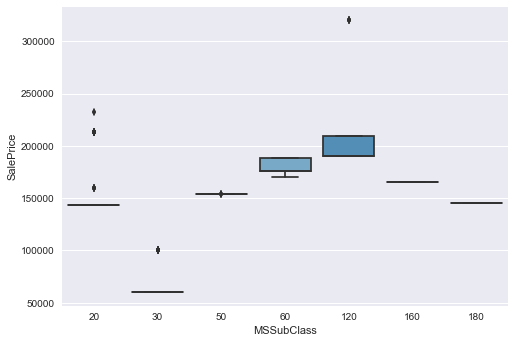

In [79]:
rows=train['MSSubClass'] # too few observations for 150， 40，45 ， so should we remove them? 
sns.boxplot(x=train.loc[rows,'MSSubClass'], y=train.loc[rows,'SalePrice'], palette='Blues')
plt.show()
# nonlinear relationship, so itis better to treat it as categorial variable.
# apparent outliers.... 

## 2) OverallQual

In [80]:
print(train['OverallQual'].unique())

count1=train.groupby("OverallQual").count()
print(count1.loc[:,'SalePrice'])

[ 5  7  6  8  4  9  3  2 10]
OverallQual
2       4
3      11
4      58
5     246
6     221
7     147
8      96
9      18
10      3
Name: SalePrice, dtype: int64


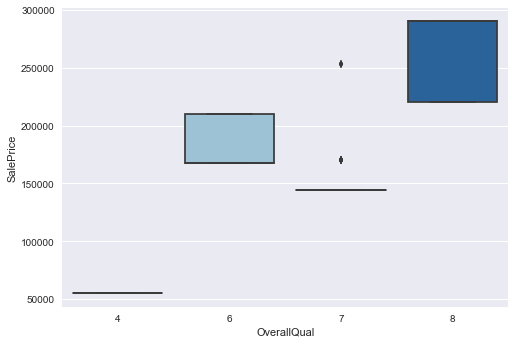

In [81]:
rows=train['OverallQual'] # this plot has problem , donot show all classes
sns.boxplot(x=train.loc[rows,'OverallQual'], y=train.loc[rows,'SalePrice'], palette='Blues')
plt.show()

## 3) OverallCond

In [82]:
print(train['OverallCond'].unique())

count1=train.groupby("OverallCond").count()
print(count1.loc[:,'SalePrice'])

[8 5 6 7 4 3 9]
OverallCond
3     15
4     27
5    420
6    172
7    113
8     49
9      8
Name: SalePrice, dtype: int64


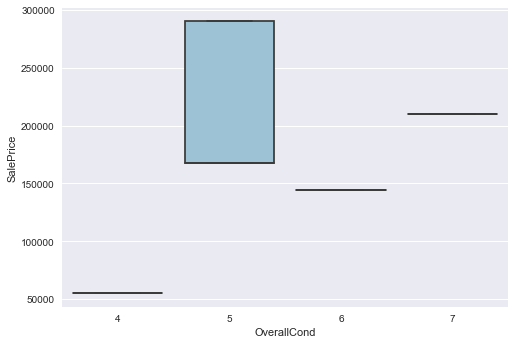

In [83]:
rows=train['OverallCond'] # this plot has problem as well
sns.boxplot(x=train.loc[rows,'OverallCond'], y=train.loc[rows,'SalePrice'], palette='Blues')
plt.show()

# Task 2: EDA

## MSZoning

In [84]:
count2=train.groupby("MSZoning").count()
print(count2.loc[:,'SalePrice'])

MSZoning
0    628
1     39
2    124
3      9
4      3
5      1
Name: SalePrice, dtype: int64


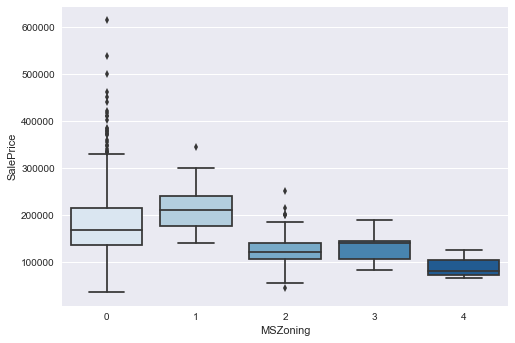

In [85]:
rows=(train['MSZoning']!='5')
sns.boxplot(x=train.loc[rows,'MSZoning'], y=train.loc[rows,'SalePrice'], palette='Blues')
plt.show() 

In [86]:
# PoolQC  
# Fence
# MiscFeature
## Chris: These are ordinal variables

### Interesting to note that PoolQC only have 3 data points that are off a different value

In [87]:
df = pd.DataFrame({'PoolQC':list(train['PoolQC'])})
pd.get_dummies(df).head()

,PoolQC_,PoolQC_Ex,PoolQC_Gd,PoolQC_TA
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


### Only 3 values with pool variables, we can just drop this

In [88]:
del train['PoolQC']
del train['PoolArea']
del test['PoolQC']
del test['PoolArea']

In [89]:
df = pd.DataFrame({'Fence':list(train['Fence'])})
train = pd.get_dummies(df).head()
#Here, the base case Fence means the house does not have a 

,Fence_,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw
0,0,0,1,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [90]:
df = pd.DataFrame({'Fence':list(train['Fence'])})
pd.get_dummies(df).head()
#Here, the base case Fence means the house does not have a 

,Fence_,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw
0,0,0,1,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


23 places have a feature out of 805 observations. Is it worthwhile to even include? Only 2% of observations have this

Therefore, I decided to remove it.

In [91]:
del train['MiscFeature']
del test['MiscFeature']

In [92]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscVal,MoSold,YrSold,SaleType,SalePrice
0,20,0,,7000,0,,0,0,0,0,...,0,0,0,0,GdWo,0,7,2009,0,136500
1,20,0,70,11767,0,,1,0,0,1,...,41,211,0,0,,900,6,2009,0,120000
2,60,0,75,9675,0,,1,0,0,1,...,48,0,0,0,,0,2,2009,0,253000
3,160,1,24,2160,0,Pave,1,0,0,1,...,0,0,0,0,,0,6,2008,0,170000
4,75,2,65,8850,0,,0,1,0,2,...,0,330,0,0,,0,7,2006,1,144000
